In [5]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns 
df= pd.read_csv('IPL.csv')

In [4]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,4/19/2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,4/20/2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,4/20/2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


# Which IPL Team is more successful?

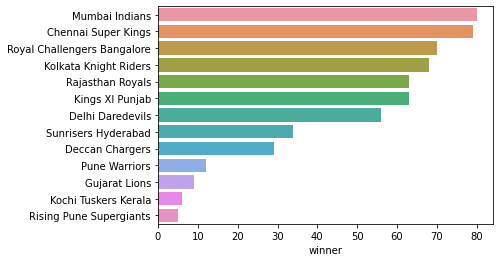

In [6]:
data = df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

# Which Team Won By Maximum Runs?

In [7]:
df.iloc[df['win_by_runs'].idxmax()]

id                                         561
season                                    2016
city                                 Bangalore
date                                 5/14/2016
team1              Royal Challengers Bangalore
team2                            Gujarat Lions
toss_winner                      Gujarat Lions
toss_decision                            field
result                                  normal
dl_applied                                   0
winner             Royal Challengers Bangalore
win_by_runs                                144
win_by_wickets                               0
player_of_match                 AB de Villiers
venue                    M Chinnaswamy Stadium
umpire1                            AY Dandekar
umpire2                              VK Sharma
umpire3                                    NaN
Name: 560, dtype: object

# Which Team won By Maximum Wickets

In [8]:
df.iloc[df['win_by_wickets'].idxmax()]

id                                         13
season                                   2008
city                                   Mumbai
date                                4/27/2008
team1                          Mumbai Indians
team2                         Deccan Chargers
toss_winner                   Deccan Chargers
toss_decision                           field
result                                 normal
dl_applied                                  0
winner                        Deccan Chargers
win_by_runs                                 0
win_by_wickets                             10
player_of_match                  AC Gilchrist
venue              Dr DY Patil Sports Academy
umpire1                             Asad Rauf
umpire2                            SL Shastri
umpire3                                   NaN
Name: 12, dtype: object

# How many Matches we have in tha dataset

In [10]:
df['id'].max()

577

# How many times toss winning team won the match?

In [11]:
ss = df['toss_winner'] == df['winner']
ss.groupby(ss).size()

False    286
True     291
dtype: int64

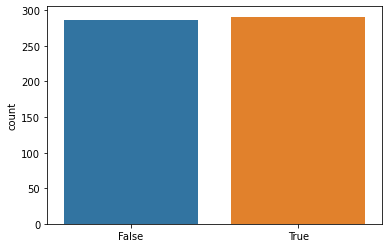

In [12]:
sns.countplot(ss)

# Team Performance in all seasons

In [15]:
df[df['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Rajasthan Royals               31.0
Rising Pune Supergiants        26.5
Royal Challengers Bangalore    26.0
Mumbai Indians                 25.0
Chennai Super Kings            24.0
Pune Warriors                  23.0
Kolkata Knight Riders          23.0
Kings XI Punjab                23.0
Delhi Daredevils               16.0
Sunrisers Hyderabad            15.5
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

# Who is the umpire in maximum Matches 

In [60]:
totalum = (df.umpire1.value_counts() + df.umpire2.value_counts()).sort_values(ascending = False)
print(totalum.head(7))

HDPK Dharmasena    87.0
S Ravi             72.0
SJA Taufel         55.0
M Erasmus          48.0
C Shamshuddin      46.0
AK Chaudhary       44.0
BR Doctrove        42.0
dtype: float64


# Which City host Maximum Number of matches

In [29]:
host = df.city.value_counts()
host.head(8)

Mumbai        77
Bangalore     58
Kolkata       54
Delhi         53
Chennai       48
Chandigarh    42
Hyderabad     41
Jaipur        33
Name: city, dtype: int64

# Maximum matches on which venue

In [32]:
stadium = df.venue.value_counts()
stadium.head(8)

M Chinnaswamy Stadium                         58
Eden Gardens                                  54
Feroz Shah Kotla                              53
Wankhede Stadium                              49
MA Chidambaram Stadium, Chepauk               48
Rajiv Gandhi International Stadium, Uppal     41
Punjab Cricket Association Stadium, Mohali    35
Sawai Mansingh Stadium                        33
Name: venue, dtype: int64

# Season-wise how many teams won who batted first or bowl first

In [46]:
matches_per_season =df.groupby('season').id.count()

In [47]:
filter1 = (df.win_by_wickets == 0) & (df.result == 'normal') 
wins_batting_first = df[filter1].groupby('season').winner.count() / matches_per_season * 100

In [48]:
filter2 = (df.win_by_runs == 0) & (df.result == 'normal')
wins_fielding_first = df[filter2].groupby('season').winner.count() / matches_per_season * 100

In [49]:
combined_wins_df = pd.concat([wins_batting_first, wins_fielding_first], axis = 1)
combined_wins_df.columns = ['batting_first', 'fielding_first']
combined_wins_df

,batting_first,fielding_first
season,,
2008,41.379310,58.620690
2009,47.368421,50.877193
2010,51.666667,46.666667
2011,45.205479,53.424658
2012,45.945946,54.054054
2013,48.684211,48.684211
2014,36.666667,61.666667
2015,54.237288,40.677966
2016,35.000000,65.000000


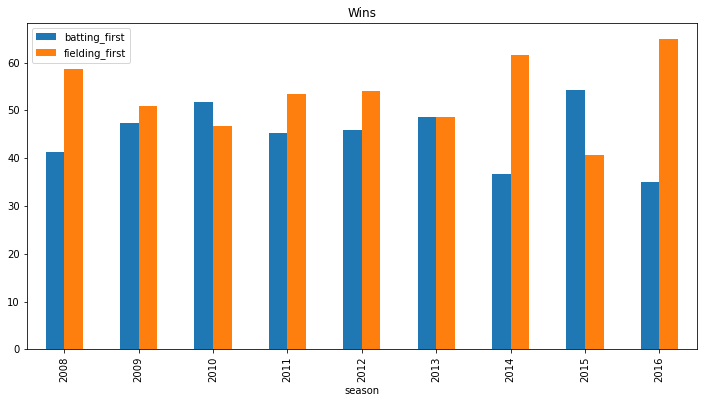

In [54]:
combined_wins_df.plot(kind = 'bar', figsize=(12,6), title = 'Wins');

# Which team played most number of matches 

In [61]:
total_matches_played = (df.team2.value_counts() + df.team1.value_counts()).sort_values(ascending = False)
total_matches_played

Mumbai Indians                 140
Royal Challengers Bangalore    139
Kings XI Punjab                134
Delhi Daredevils               133
Kolkata Knight Riders          132
Chennai Super Kings            131
Rajasthan Royals               118
Deccan Chargers                 75
Sunrisers Hyderabad             62
Pune Warriors                   46
Gujarat Lions                   16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64